# Import Library

In [1]:
import id_aldo
import requests
import datetime
import id_beritagar as indo
from pprint import pprint
from bs4 import BeautifulSoup
from tqdm import tqdm, tqdm_notebook
from textacy.preprocess import  preprocess_text

# Set Default Variable

In [2]:
# Set Datetime
now = datetime.date.today()

# Get Data with Scrapping Method
## Data From Tempo.co

In [2]:
url = '''https://www.tempo.co/indeks/2019/11/10/tekno'''
response = requests.get(url).text
soup = BeautifulSoup(response, "html5lib")

In [3]:
# Get Content
contents = soup.select('.list.list-type-1 > ul > li')

### Result of Contents

In [4]:
contents

[<li>
 					 <div class="card card-type-1">
 						 <div class="wrapper clearfix">
 							 <a class="col" href="https://tekno.tempo.co/read/1270342/lg-sabet-penghargaan-2020-ces-innovation-awards">
 								 <img src="https://statik.tempo.co/data/2019/04/11/id_833520/833520_400.jpg"/>
 							 </a>
 							 <a class="col" href="https://tekno.tempo.co/read/1270342/lg-sabet-penghargaan-2020-ces-innovation-awards">
 								 <h2 class="title">LG Sabet Penghargaan 2020 CES Innovation Awards</h2>
 								 <p>Penghargaan Best of Innovation Award bagi TV OLED LG diberikan dari kategori penampil video.</p>
 								 <span class="col">10 November 2019 00:10 WIB</span>
 							 </a>
 						 </div>
 					 </div>
 				 </li>, <li>
 					 <div class="card card-type-1">
 						 <div class="wrapper clearfix">
 							 <a class="col" href="https://tekno.tempo.co/read/1270311/uob-kenalkan-program-u-solar-transisi-ke-listrik-tenaga-surya">
 								 <img src="https://statik.tempo.co/data/2019/11/09/id

### Clean HTML

In [5]:
# Save the Data Into List with Json Format
data = []
for content in tqdm(contents):
    urlTempo = content.select_one('a')['href']
    categoryTempo = url.split('/')[7]
    titleTempo = content.select_one('.title').text
    dateTempo = url.split('/')[6] + '-' + url.split('/')[5] + '-' + url.split('/')[4]
    
    json = {
        'category': categoryTempo,
        'title': titleTempo,
        'description': '',
        'url': urlTempo,
        'content': '',
        'img': '',
        'subCategory': '',
        'publishedAt': dateTempo,
        'source': 'tempo.co',
        'cleanContent': ''
    }
    
    data.append(json)

100%|██████████| 3/3 [00:00<00:00, 2210.63it/s]


### Result

In [6]:
print('Total Artikel : {}'.format(len(data)))
print('================================\n')
pprint(data)

Total Artikel : 3

[{'category': 'tekno',
  'cleanContent': '',
  'content': '',
  'description': '',
  'img': '',
  'publishedAt': '10-11-2019',
  'source': 'tempo.co',
  'subCategory': '',
  'title': 'LG Sabet Penghargaan 2020 CES Innovation Awards',
  'url': 'https://tekno.tempo.co/read/1270342/lg-sabet-penghargaan-2020-ces-innovation-awards'},
 {'category': 'tekno',
  'cleanContent': '',
  'content': '',
  'description': '',
  'img': '',
  'publishedAt': '10-11-2019',
  'source': 'tempo.co',
  'subCategory': '',
  'title': 'UoB Kenalkan Program U-Solar, Transisi ke Listrik Tenaga Surya',
  'url': 'https://tekno.tempo.co/read/1270311/uob-kenalkan-program-u-solar-transisi-ke-listrik-tenaga-surya'},
 {'category': 'tekno',
  'cleanContent': '',
  'content': '',
  'description': '',
  'img': '',
  'publishedAt': '10-11-2019',
  'source': 'tempo.co',
  'subCategory': '',
  'title': 'Siswa JIS Buat Aplikasi BAPAT, Panduan Saat Bencana',
  'url': 'https://tekno.tempo.co/read/1270302/siswa-

## Get Content Articles

In [7]:
urlContent = data[0]['url']
responseContent = requests.get(urlContent).text
soupContent = BeautifulSoup(responseContent, "html5lib")

In [8]:
# Get Sub Category and Image
subCategory = soupContent.select('.breadcrumbs > li ')[1].text
image = soupContent.select_one('figure > a')['href']

In [9]:
articles = soupContent.select('#isi > p')

### Content of Articles

In [10]:
tempArticle = []
for article in articles: 
    print(article.text.strip() + '\n')
    tempArticle.append(article.text.strip() + '\n\n')

content = ''.join(tempArticle)

TEMPO.CO, Jakarta - Inovasi LG Electronics (LG) mendapatkan penghargaan 2020 CES Innovation Awards, yaitu TV OLED LG sebagai pemenang Best of Innovation Award. Raihan ini sekaligus mencatatkan kesuksesan LG dalam menyabet penghargaan yang sama sepanjang delapan tahun berturut-turut.

CES Innovation Awards merupakan ajang kompetisi global tahunan yang memberikan apresiasi pada produk teknologi bagi konsumer atas desain dan inovasi teknologi yang dibawanya. Terdapat 28 kategori yang dipertandingkan dengan panel penilai berasal dari jajaran ahli, media, desainer dan lainnya.

Dihelat oleh Consumer Technology Association yang menjadi standar dan merepresentasikan lebih dari 2.200 perusahaan produk teknologi bagi consumer, ajang ini menjelma menjadi kompetisi paling bergengsi yang menyajikan berbagai inovasi terkini dalam industri elektronik consumer.

Penghargaan Best of Innovation Award bagi TV OLED LG diberikan dari kategori penampil video. Pencapaian ini memperpanjang pengakuan terhadap

### Insert Article Into Data

In [11]:
temp = []
temp = data[0]

In [12]:
temp['img'] = image
temp['subCategory'] = subCategory
temp['content'] = content

### Result

In [13]:
pprint(temp)

{'category': 'tekno',
 'cleanContent': '',
 'content': 'TEMPO.CO, Jakarta - Inovasi LG Electronics (LG) mendapatkan '
            'penghargaan 2020 CES Innovation Awards, yaitu TV OLED LG sebagai '
            'pemenang Best of Innovation Award. Raihan ini sekaligus '
            'mencatatkan kesuksesan LG dalam menyabet penghargaan yang sama '
            'sepanjang delapan tahun berturut-turut.\n'
            '\n'
            'CES Innovation Awards merupakan ajang kompetisi global tahunan '
            'yang memberikan apresiasi pada produk teknologi bagi konsumer '
            'atas desain dan inovasi teknologi yang dibawanya. Terdapat 28 '
            'kategori yang dipertandingkan dengan panel penilai berasal dari '
            'jajaran ahli, media, desainer dan lainnya.\n'
            '\n'
            'Dihelat oleh Consumer Technology Association yang menjadi standar '
            'dan merepresentasikan lebih dari 2.200 perusahaan produk '
            'teknologi bagi consumer, aj

# Preprocessing

In [14]:
import spacy
from spacy import displacy

In [15]:
nlp = id_aldo.load()

In [16]:
def formatArticle(text=None):
    doc = nlp(text)
    count = 0
    for ent in doc.ents:
        if ent.end <= 5:
            count = ent.end_char + 1
        else:
            count = len(text)

    result = text[count:].strip()

    return result

### Delete Format Publisher

In [17]:
doc = nlp(temp['content'])

In [18]:
displacy.render(doc, jupyter=True, style='ent')

### Result

In [19]:
result = formatArticle(temp['content'])
print(result)

Inovasi LG Electronics (LG) mendapatkan penghargaan 2020 CES Innovation Awards, yaitu TV OLED LG sebagai pemenang Best of Innovation Award. Raihan ini sekaligus mencatatkan kesuksesan LG dalam menyabet penghargaan yang sama sepanjang delapan tahun berturut-turut.

CES Innovation Awards merupakan ajang kompetisi global tahunan yang memberikan apresiasi pada produk teknologi bagi konsumer atas desain dan inovasi teknologi yang dibawanya. Terdapat 28 kategori yang dipertandingkan dengan panel penilai berasal dari jajaran ahli, media, desainer dan lainnya.

Dihelat oleh Consumer Technology Association yang menjadi standar dan merepresentasikan lebih dari 2.200 perusahaan produk teknologi bagi consumer, ajang ini menjelma menjadi kompetisi paling bergengsi yang menyajikan berbagai inovasi terkini dalam industri elektronik consumer.

Penghargaan Best of Innovation Award bagi TV OLED LG diberikan dari kategori penampil video. Pencapaian ini memperpanjang pengakuan terhadap keunggulan teknolog

## Preprocessing
### Case Folding 

In [40]:
lowerCase = preprocess_text(result,
                            fix_unicode=True, 
                            lowercase=True, 
                            no_urls=True,
                            no_emails=True,
                            no_phone_numbers=True,
                            no_numbers=True,
                            no_currency_symbols=True,
                            no_punct=True)
print(lowerCase)

inovasi lg electronics lg mendapatkan penghargaan number ces innovation awards yaitu tv oled lg sebagai pemenang best of innovation award raihan ini sekaligus mencatatkan kesuksesan lg dalam menyabet penghargaan yang sama sepanjang delapan tahun berturut turut ces innovation awards merupakan ajang kompetisi global tahunan yang memberikan apresiasi pada produk teknologi bagi konsumer atas desain dan inovasi teknologi yang dibawanya terdapat number kategori yang dipertandingkan dengan panel penilai berasal dari jajaran ahli media desainer dan lainnya dihelat oleh consumer technology association yang menjadi standar dan merepresentasikan lebih dari number perusahaan produk teknologi bagi consumer ajang ini menjelma menjadi kompetisi paling bergengsi yang menyajikan berbagai inovasi terkini dalam industri elektronik consumer penghargaan best of innovation award bagi tv oled lg diberikan dari kategori penampil video pencapaian ini memperpanjang pengakuan terhadap keunggulan teknologi tv ole

## Preprocessing
### Tokenization 

In [43]:
tokens = nltk.tokenize.word_tokenize(lowerCase)
print(tokens)

['inovasi', 'lg', 'electronics', 'lg', 'mendapatkan', 'penghargaan', 'number', 'ces', 'innovation', 'awards', 'yaitu', 'tv', 'oled', 'lg', 'sebagai', 'pemenang', 'best', 'of', 'innovation', 'award', 'raihan', 'ini', 'sekaligus', 'mencatatkan', 'kesuksesan', 'lg', 'dalam', 'menyabet', 'penghargaan', 'yang', 'sama', 'sepanjang', 'delapan', 'tahun', 'berturut', 'turut', 'ces', 'innovation', 'awards', 'merupakan', 'ajang', 'kompetisi', 'global', 'tahunan', 'yang', 'memberikan', 'apresiasi', 'pada', 'produk', 'teknologi', 'bagi', 'konsumer', 'atas', 'desain', 'dan', 'inovasi', 'teknologi', 'yang', 'dibawanya', 'terdapat', 'number', 'kategori', 'yang', 'dipertandingkan', 'dengan', 'panel', 'penilai', 'berasal', 'dari', 'jajaran', 'ahli', 'media', 'desainer', 'dan', 'lainnya', 'dihelat', 'oleh', 'consumer', 'technology', 'association', 'yang', 'menjadi', 'standar', 'dan', 'merepresentasikan', 'lebih', 'dari', 'number', 'perusahaan', 'produk', 'teknologi', 'bagi', 'consumer', 'ajang', 'ini', '

In [42]:
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())

[('lg', 20), ('yang', 20), ('penghargaan', 11), ('number', 10), ('pada', 9), ('ces', 7), ('innovation', 7), ('akan', 7), ('tv', 6), ('oled', 6), ('ini', 6), ('dengan', 6), ('dari', 6), ('consumer', 6), ('dalam', 5), ('produk', 5), ('bagi', 5), ('dan', 5), ('kategori', 5), ('electronics', 4), ('awards', 4), ('award', 4), ('tahun', 4), ('teknologi', 4), ('elektronik', 4), ('di', 4), ('inovasi', 3), ('yaitu', 3), ('menjadi', 3), ('meraih', 3), ('rumah', 3), ('gelaran', 3), ('show', 3), ('thinq', 3), ('sebagai', 2), ('best', 2), ('of', 2), ('menyabet', 2), ('sama', 2), ('sepanjang', 2), ('turut', 2), ('ajang', 2), ('kompetisi', 2), ('panel', 2), ('berasal', 2), ('jajaran', 2), ('media', 2), ('lainnya', 2), ('tiga', 2), ('hiburan', 2), ('generasi', 2), ('diperkenalkan', 2), ('resmi', 2), ('januari', 2), ('lengkap', 2), ('perangkat', 2), ('diterima', 2), ('door', 2), ('fitur', 2), ('juga', 2), ('smartphone', 2), ('mendapatkan', 1), ('pemenang', 1), ('raihan', 1), ('sekaligus', 1), ('mencatat

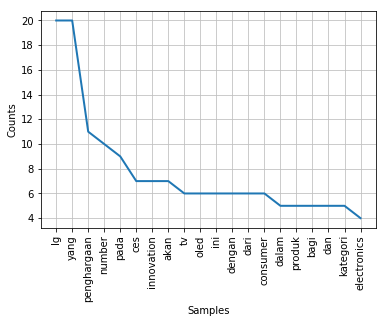

In [46]:
import matplotlib.pyplot as plt
kemunculan.plot(20,cumulative=False)
plt.show()

## Preprocessing
### Filtering (Stopword Removal)

In [47]:
stopwords = requests.get("https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt").text.split("\n")

In [69]:
text_stopword = []
words = lowerCase.split()
for word in words:
    if word not in stopwords: text_stopword.append(word)

In [72]:
resultFiltering = ' '.join(text_stopword)

### Result

In [73]:
print(resultFiltering)

inovasi lg electronics lg penghargaan number ces innovation awards tv oled lg pemenang best of innovation award raihan mencatatkan kesuksesan lg menyabet penghargaan delapan ces innovation awards ajang kompetisi global tahunan apresiasi produk teknologi konsumer desain inovasi teknologi dibawanya number kategori dipertandingkan panel penilai berasal jajaran ahli media desainer dihelat consumer technology association standar merepresentasikan number perusahaan produk teknologi consumer ajang menjelma kompetisi bergengsi menyajikan inovasi terkini industri elektronik consumer penghargaan best of innovation award tv oled lg kategori penampil video pencapaian memperpanjang pengakuan keunggulan teknologi tv oled lg meraih penghargaan kali kategori produk elektronik hiburan rumah catatan utama keberhasilan lg meraih penghargaan number ces innovation awards berasal pengembangan generasi terbaru tv oled lg atsc number tv oled lg membuka era tv generasi diperkenalkan resmi gelaran consumer elec

### Comparing

In [74]:
print('Sebelum Filtering ')
print('==========================\n')
print(lowerCase)
print()

print('Sesudah Filtering ')
print('==========================\n')
print(resultFiltering)

Sebelum Filtering 

inovasi lg electronics lg mendapatkan penghargaan number ces innovation awards yaitu tv oled lg sebagai pemenang best of innovation award raihan ini sekaligus mencatatkan kesuksesan lg dalam menyabet penghargaan yang sama sepanjang delapan tahun berturut turut ces innovation awards merupakan ajang kompetisi global tahunan yang memberikan apresiasi pada produk teknologi bagi konsumer atas desain dan inovasi teknologi yang dibawanya terdapat number kategori yang dipertandingkan dengan panel penilai berasal dari jajaran ahli media desainer dan lainnya dihelat oleh consumer technology association yang menjadi standar dan merepresentasikan lebih dari number perusahaan produk teknologi bagi consumer ajang ini menjelma menjadi kompetisi paling bergengsi yang menyajikan berbagai inovasi terkini dalam industri elektronik consumer penghargaan best of innovation award bagi tv oled lg diberikan dari kategori penampil video pencapaian ini memperpanjang pengakuan terhadap keunggu

## Preprocessing
### Stemming

In [76]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [77]:
# stemming process
output   = stemmer.stem(resultFiltering)

print(output)

inovasi lg electronics lg harga number ces innovation awards tv oled lg menang best of innovation award raih catat sukses lg sabet harga delapan ces innovation awards ajang kompetisi global tahun apresiasi produk teknologi konsumer desain inovasi teknologi bawa number kategori tanding panel nilai asal jajar ahli media desainer helat consumer technology association standar representasi number usaha produk teknologi consumer ajang jelma kompetisi gengsi saji inovasi kini industri elektronik consumer harga best of innovation award tv oled lg kategori tampil video capai panjang aku unggul teknologi tv oled lg raih harga kali kategori produk elektronik hibur rumah catat utama hasil lg raih harga number ces innovation awards asal kembang generasi baru tv oled lg atsc number tv oled lg buka era tv generasi kenal resmi gelar consumer electronics show number januari gelar lg umum lengkap produk kategori perangkat elektronik hibur rumah terima harga jajar kategori produk elektronik rumah tangga 